In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
chennai = pd.read_csv(r'chennai_reservoir_levels.csv')
chennai

,Date,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM
0,01-01-2004,3.9,0.0,268.0,0.0
1,02-01-2004,3.9,0.0,268.0,0.0
2,03-01-2004,3.9,0.0,267.0,0.0
3,04-01-2004,3.9,0.0,267.0,0.0
4,05-01-2004,3.8,0.0,267.0,0.0
...,...,...,...,...,...
5642,13-06-2019,30.0,0.0,0.0,1.0
5643,14-06-2019,28.0,0.0,0.0,1.0
5644,15-06-2019,27.0,0.0,0.0,1.0
5645,16-06-2019,26.0,0.0,0.0,1.0


In [3]:
#Problem Statement: Verify claims of decreasing water level, real-life data, dams are the columns
chennai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5647 entries, 0 to 5646
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             5647 non-null   object 
 1   POONDI           5647 non-null   float64
 2   CHOLAVARAM       5647 non-null   float64
 3   REDHILLS         5647 non-null   float64
 4   CHEMBARAMBAKKAM  5647 non-null   float64
dtypes: float64(4), object(1)
memory usage: 220.7+ KB


In [4]:
#Date conversion from object format to ddmmyyyy format
chennai['Date'] = pd.to_datetime(chennai['Date'],format= '%d-%m-%Y')

In [5]:
chennai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5647 entries, 0 to 5646
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             5647 non-null   datetime64[ns]
 1   POONDI           5647 non-null   float64       
 2   CHOLAVARAM       5647 non-null   float64       
 3   REDHILLS         5647 non-null   float64       
 4   CHEMBARAMBAKKAM  5647 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 220.7 KB


In [6]:
chennai[['POONDI','CHOLAVARAM',
         'REDHILLS','CHEMBARAMBAKKAM']] = chennai[['POONDI','CHOLAVARAM',
                                                   'REDHILLS','CHEMBARAMBAKKAM']].apply(pd.to_numeric)

In [7]:
chennai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5647 entries, 0 to 5646
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             5647 non-null   datetime64[ns]
 1   POONDI           5647 non-null   float64       
 2   CHOLAVARAM       5647 non-null   float64       
 3   REDHILLS         5647 non-null   float64       
 4   CHEMBARAMBAKKAM  5647 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 220.7 KB


In [8]:
chennai['Year'] = chennai['Date'].apply(lambda x:x.year)
chennai['Month'] = chennai['Date'].apply(lambda x:x.month)

In [9]:
chennai['Total_Reservoirs'] = chennai[['POONDI','CHOLAVARAM',
                                       'REDHILLS','CHEMBARAMBAKKAM']].sum(axis=1)
chennai

,Date,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM,Year,Month,Total_Reservoirs
0,2004-01-01,3.9,0.0,268.0,0.0,2004,1,271.9
1,2004-01-02,3.9,0.0,268.0,0.0,2004,1,271.9
2,2004-01-03,3.9,0.0,267.0,0.0,2004,1,270.9
3,2004-01-04,3.9,0.0,267.0,0.0,2004,1,270.9
4,2004-01-05,3.8,0.0,267.0,0.0,2004,1,270.8
...,...,...,...,...,...,...,...,...
5642,2019-06-13,30.0,0.0,0.0,1.0,2019,6,31.0
5643,2019-06-14,28.0,0.0,0.0,1.0,2019,6,29.0
5644,2019-06-15,27.0,0.0,0.0,1.0,2019,6,28.0
5645,2019-06-16,26.0,0.0,0.0,1.0,2019,6,27.0


In [10]:
Yearwise = chennai.groupby('Year',as_index=False)
Yearwise.mean()

,Year,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM,Month,Total_Reservoirs
0,2004,77.766967,19.060109,220.899180,68.683060,6.513661,386.409317
1,2005,722.680603,147.771781,1468.480712,581.345205,6.526027,2920.278301
2,2006,1827.553425,484.947945,2044.356164,2075.317808,6.526027,6432.175342
3,2007,1794.912329,286.391781,2356.654795,1715.126027,6.526027,6153.084932
4,2008,1862.338798,545.609290,2445.161202,2196.967213,6.513661,7050.076503
5,2009,1846.221918,414.882110,1969.731205,1795.677123,6.526027,6026.512356
6,2010,1651.523288,382.175342,2045.271233,2020.501370,6.526027,6099.471233
7,2011,2399.068493,499.509589,2573.326027,2492.282192,6.526027,7964.186301
8,2012,1742.816940,225.934426,1872.218579,1571.677596,6.513661,5412.647541
9,2013,536.953425,100.049315,1324.109589,988.964384,6.526027,2950.076712


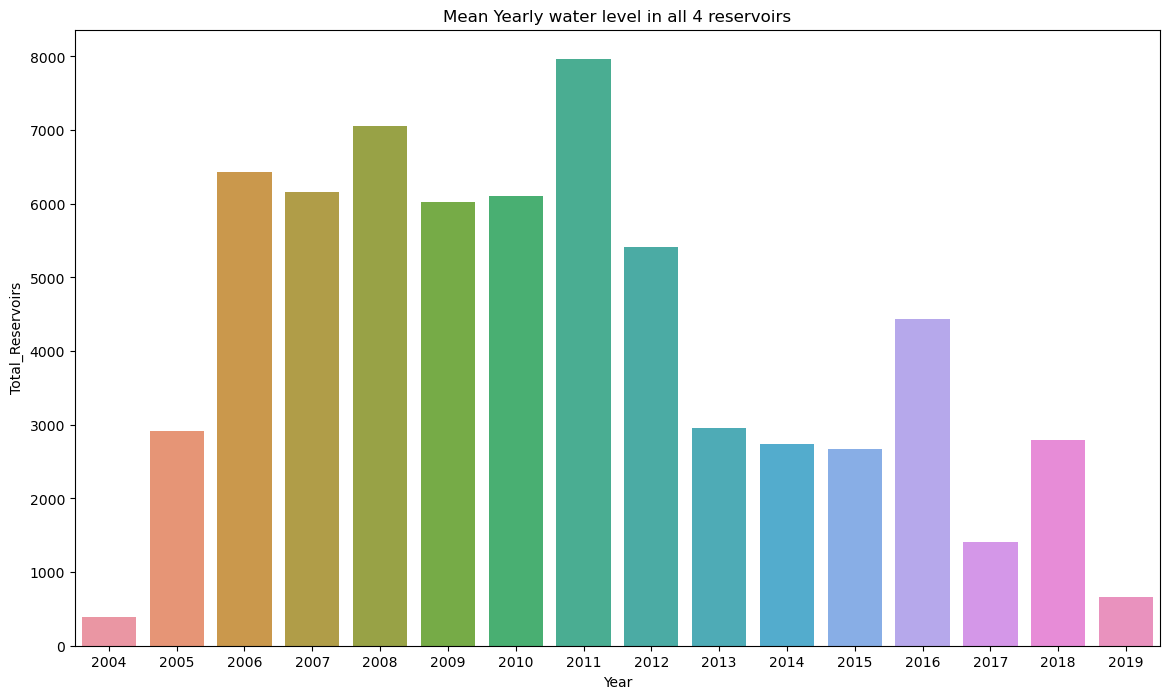

In [11]:
plt.figure(figsize=(14,8))
sns.barplot(x='Year',y='Total_Reservoirs',data=Yearwise.mean())
plt.title('Mean Yearly water level in all 4 reservoirs')
plt.show()

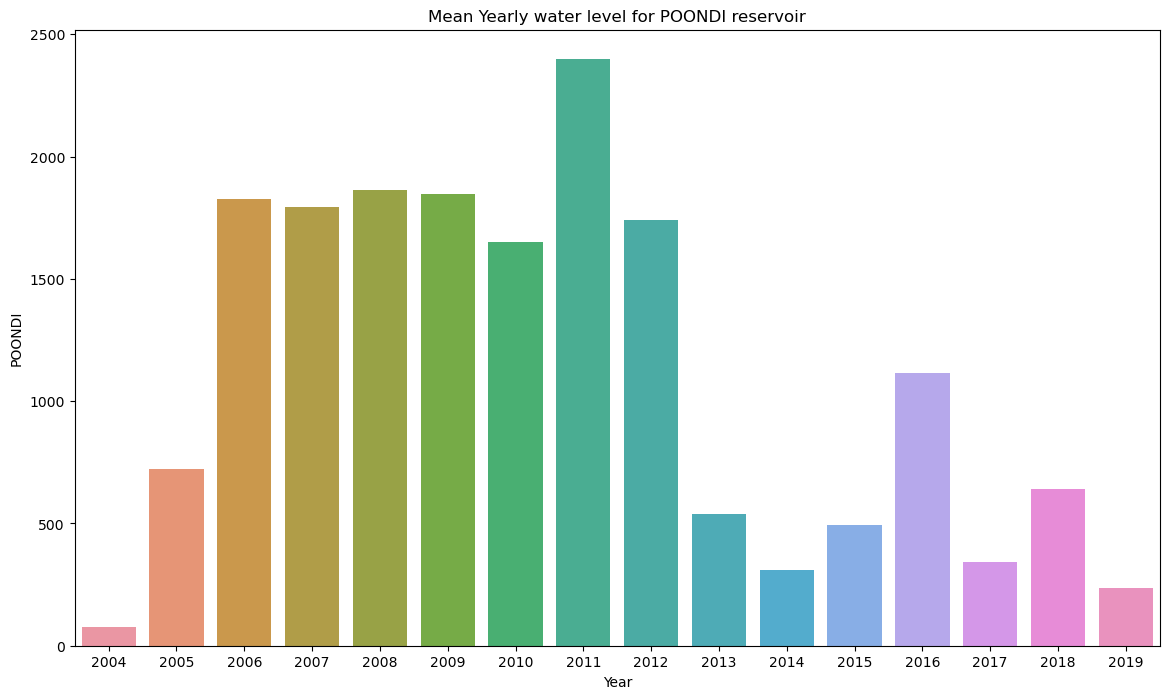

In [12]:
plt.figure(figsize=(14,8))
sns.barplot(x='Year',y='POONDI',data=Yearwise.mean())
plt.title('Mean Yearly water level for POONDI reservoir')
plt.show()

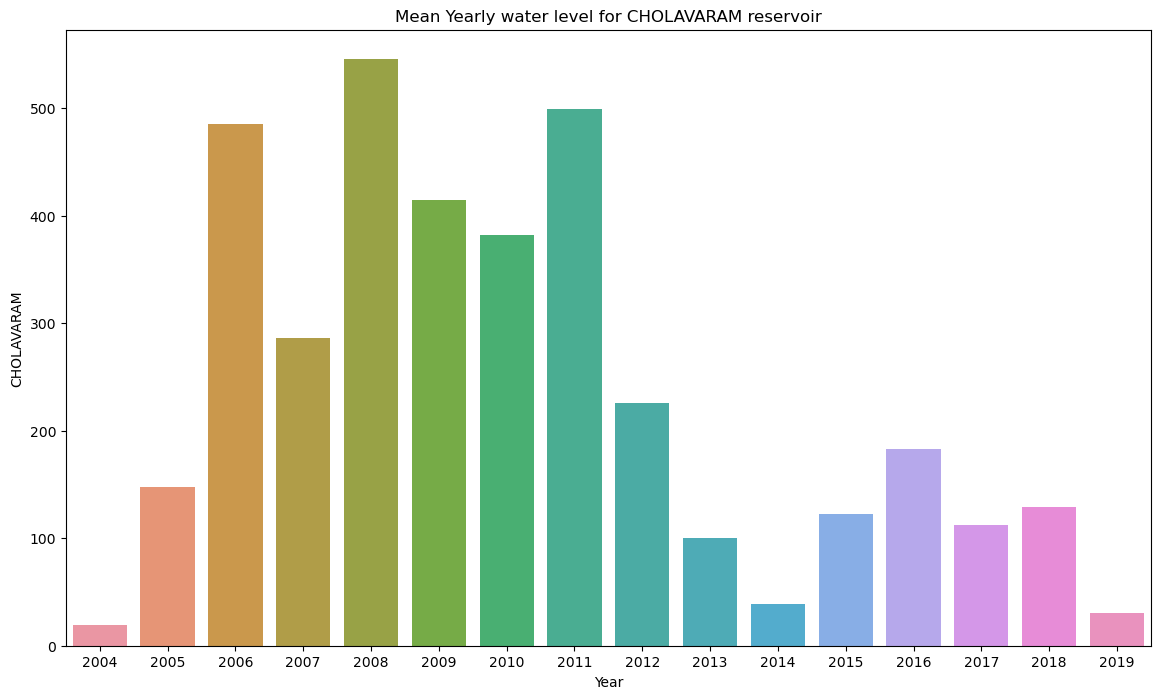

In [13]:
plt.figure(figsize=(14,8))
sns.barplot(x='Year',y='CHOLAVARAM',data=Yearwise.mean())
plt.title('Mean Yearly water level for CHOLAVARAM reservoir')
plt.show()

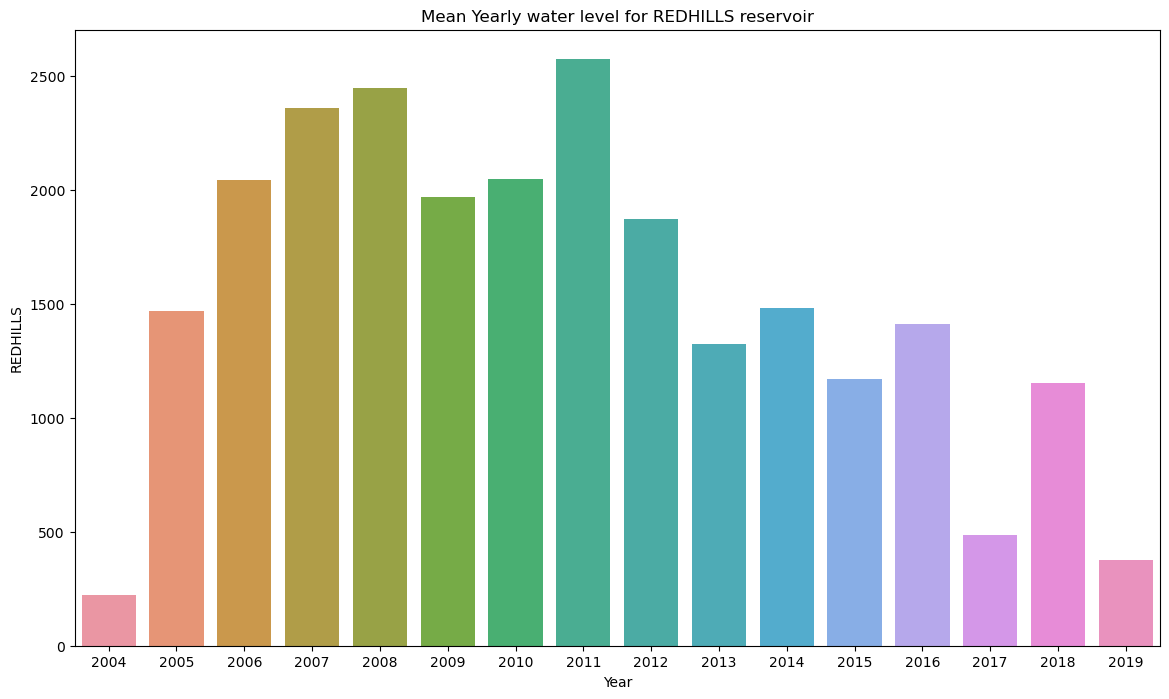

In [14]:
plt.figure(figsize=(14,8))
sns.barplot(x='Year',y='REDHILLS',data=Yearwise.mean())
plt.title('Mean Yearly water level for REDHILLS reservoir')
plt.show()

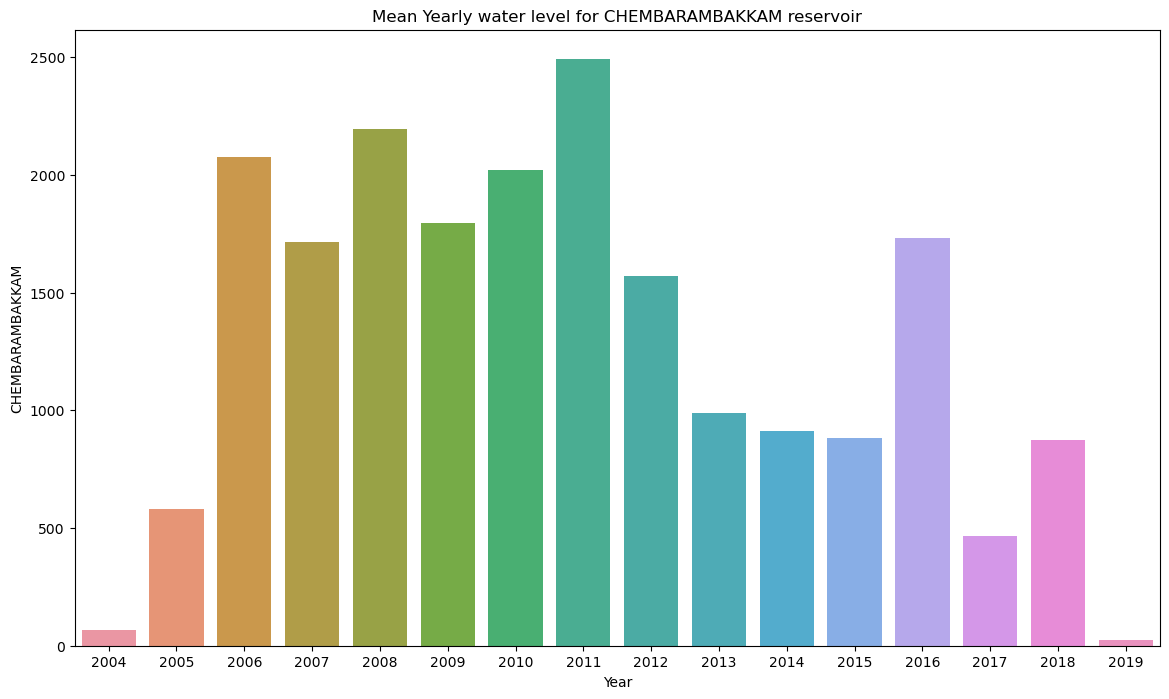

In [15]:
plt.figure(figsize=(14,8))
sns.barplot(x='Year',y='CHEMBARAMBAKKAM',data=Yearwise.mean())
plt.title('Mean Yearly water level for CHEMBARAMBAKKAM reservoir')
plt.show()

<AxesSubplot:xlabel='Year'>

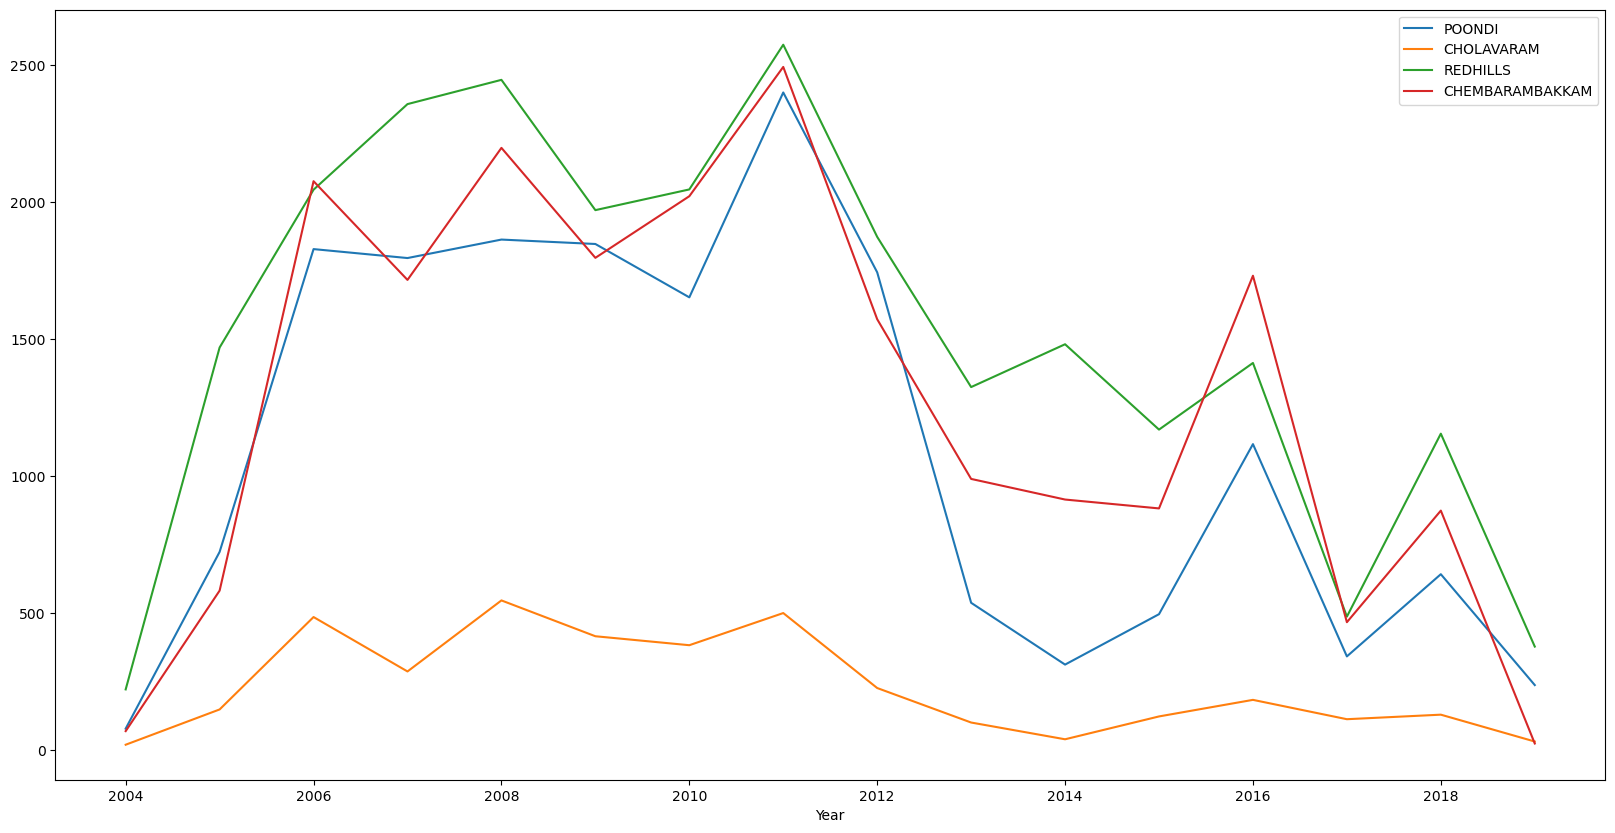

In [17]:
Yearwise.mean().plot(x='Year', y = ['POONDI','CHOLAVARAM',
                                       'REDHILLS','CHEMBARAMBAKKAM'], figsize=(20,10))

In [18]:
chennai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5647 entries, 0 to 5646
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              5647 non-null   datetime64[ns]
 1   POONDI            5647 non-null   float64       
 2   CHOLAVARAM        5647 non-null   float64       
 3   REDHILLS          5647 non-null   float64       
 4   CHEMBARAMBAKKAM   5647 non-null   float64       
 5   Year              5647 non-null   int64         
 6   Month             5647 non-null   int64         
 7   Total_Reservoirs  5647 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 353.1 KB


In [19]:
chennai['Month']=pd.Categorical(chennai['Month'])

In [20]:
chennai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5647 entries, 0 to 5646
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              5647 non-null   datetime64[ns]
 1   POONDI            5647 non-null   float64       
 2   CHOLAVARAM        5647 non-null   float64       
 3   REDHILLS          5647 non-null   float64       
 4   CHEMBARAMBAKKAM   5647 non-null   float64       
 5   Year              5647 non-null   int64         
 6   Month             5647 non-null   category      
 7   Total_Reservoirs  5647 non-null   float64       
dtypes: category(1), datetime64[ns](1), float64(5), int64(1)
memory usage: 314.8 KB


In [21]:
chennai['Year'] = chennai['Year'].astype('category')

In [22]:
chennai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5647 entries, 0 to 5646
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              5647 non-null   datetime64[ns]
 1   POONDI            5647 non-null   float64       
 2   CHOLAVARAM        5647 non-null   float64       
 3   REDHILLS          5647 non-null   float64       
 4   CHEMBARAMBAKKAM   5647 non-null   float64       
 5   Year              5647 non-null   category      
 6   Month             5647 non-null   category      
 7   Total_Reservoirs  5647 non-null   float64       
dtypes: category(2), datetime64[ns](1), float64(5)
memory usage: 276.9 KB


<AxesSubplot:xlabel='Year', ylabel='Total_Reservoirs'>

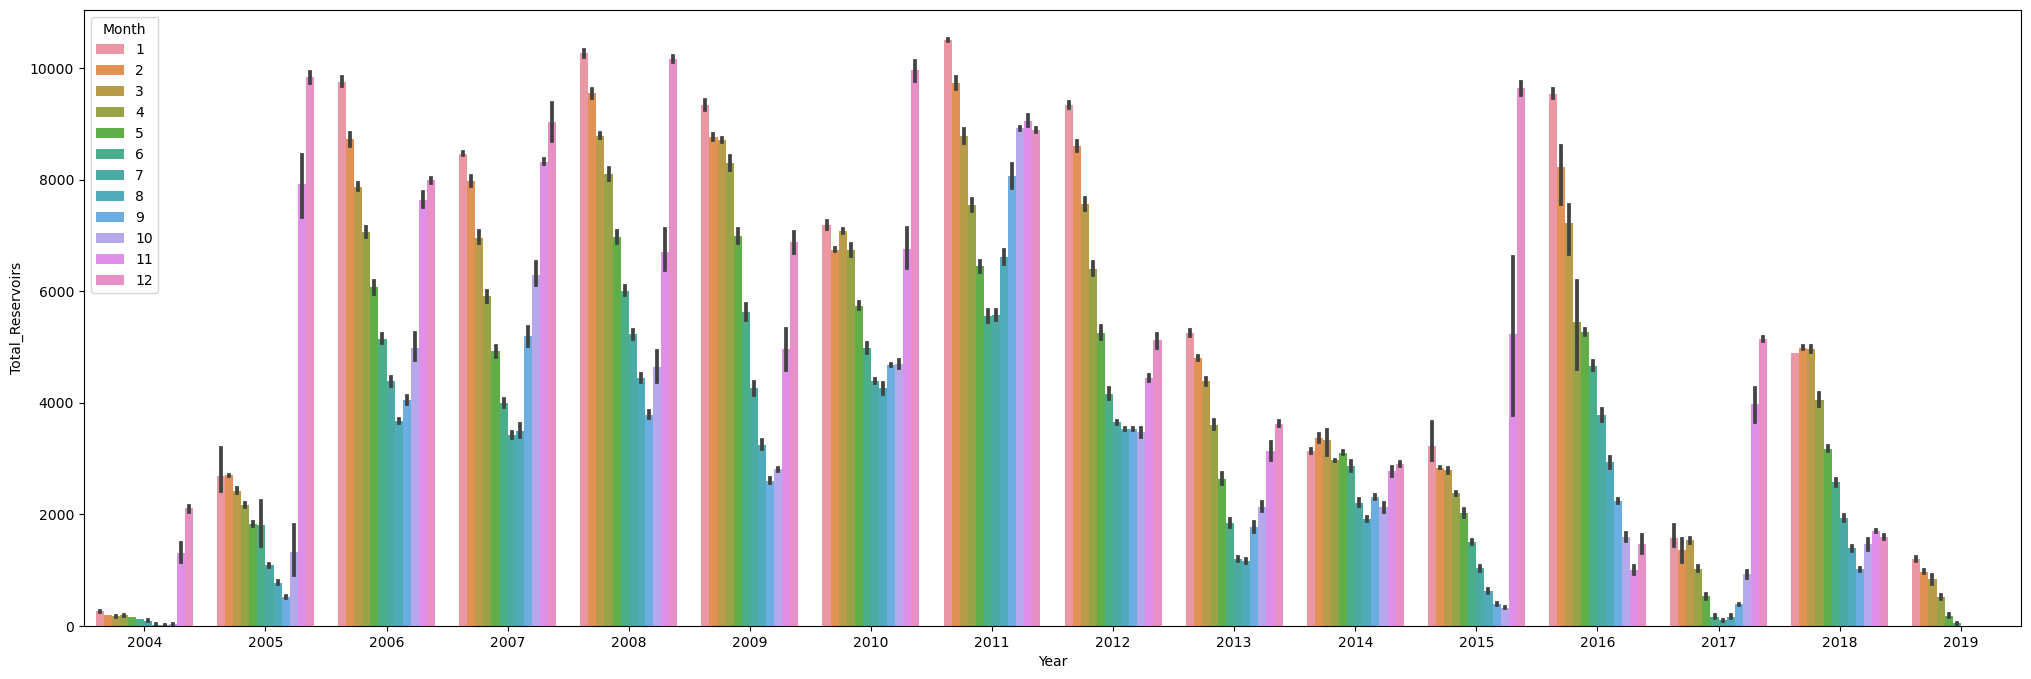

In [23]:
plt.figure(figsize=(25,8))
sns.barplot(x='Year',y='Total_Reservoirs',data=chennai, hue='Month')

# Inferences:
#### Although chennai receive some rainfall in July, Aug, Sep due to South-west monsoon, but majority of rainfall happens from Oct to Dec due to North-east monsoon.
#### From 2006 to 2010, NE monsoon has much more contribution than SW monsoon, but in last few years, either both SW & NE monsoons are contributing equally or SW is contributing much more than NE.
#### Declining NE monsoon rainfall in recent year is in line with declining water level in 4 reservoirs in corresponding period (eg. 2014)

<AxesSubplot:xlabel='Year', ylabel='Total_Reservoirs'>

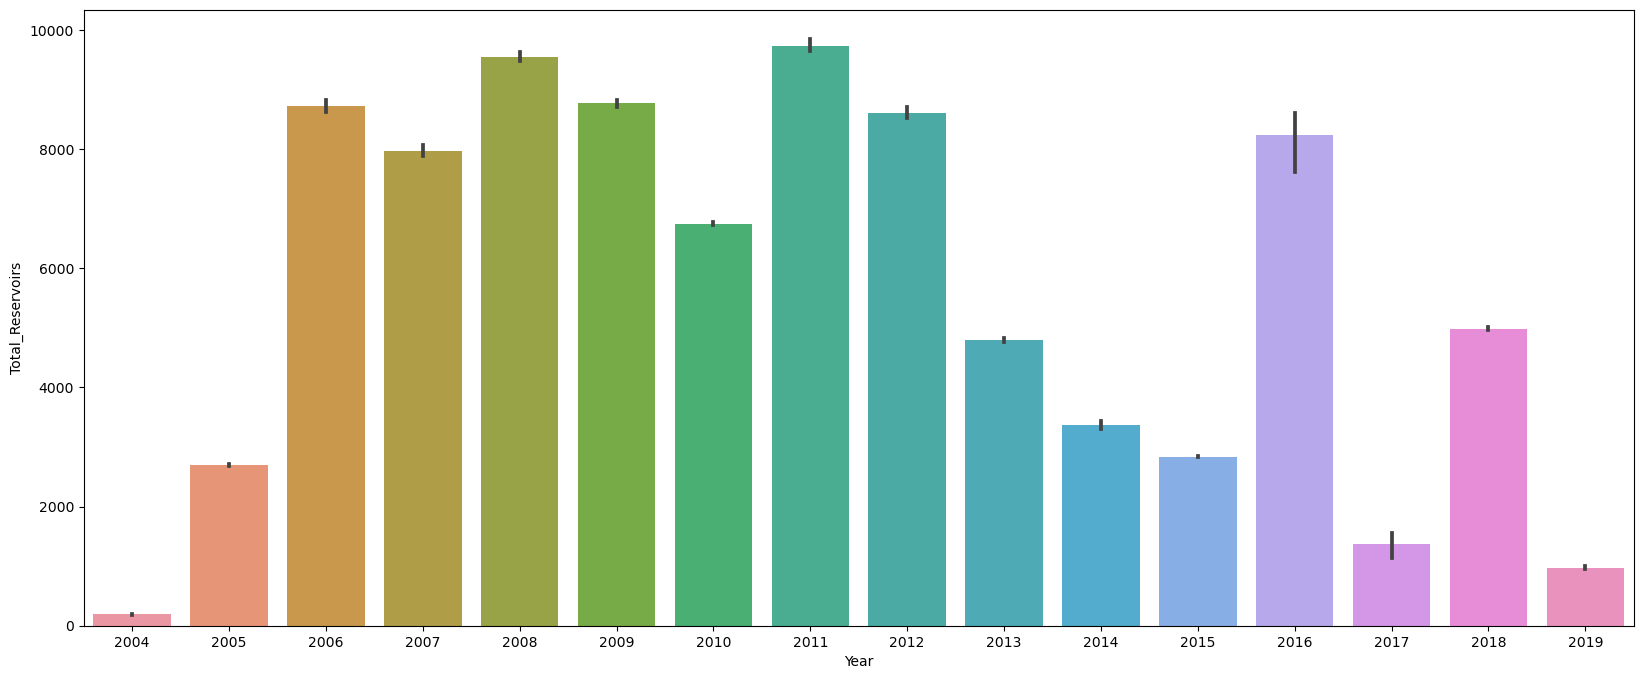

In [26]:
#last 4 years
feb = chennai[chennai['Month']==2]
plt.figure(figsize=(20,8))
sns.barplot(x='Year', y = 'Total_Reservoirs',data=feb)